# 데이터 분석 시작해보자

본 커널은 DHH(Digital Health Hack)에 참가하게 되어 기초가 부족한 상태에서 다른 팀원분들의 진행 과정을 최소한이라도 이해하고 따라가기 위해 학습하는 과정을 기록한 커널입니다.

### Reference

해당 커널은 아래 링크의 멋지고 환상적인 분석을 해주신 곽대훈님의 캐글 커널을 참고하였습니다.

[Kaggle 공개 커널, 곽대훈님의 데이터 분석 어떻게 시작해야 하나요?](https://www.kaggle.com/daehungwak/guide-kor-dg/notebook)

참고한 튜토리얼의 프로세스 진행에 맞춰 학습하였습니다.

##### 참고 커널의 진행 과정
1. 데이터 셋 확인
2. 탐색적 데이터 분석 (EDA, Exploratory Data Analysis)
3. 특성 공학 (Feature Engineering)
4. 모델 개발 및 학습
5. 모델 예측 및 평가

## 1. 데이터 셋 확인

일단 필요한 패키지(라이브러리)들을 import 합니다.

In [165]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

plt.style.use('seaborn')
sns.set(font_scale=2.5)

위의 코드는 참고 커널의 필자가 항상 쓰는 방법이라고 합니다.

matplotlib의 기본 schema 말고 seaborn의 scheme를 세팅하여 사용하면 편하다고 합니다.

In [166]:
import missingno as msno
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [167]:
os.listdir('./input')

['test.csv', 'train.csv', 'gender_submission.csv']

필요한 파일들을 root 경로에서 `input` 폴더를 생성하고 생성한 폴더로 옮겨주었습니다.

`os.listdir` 메소드를 이용하여 확인해보았습니다.

In [168]:
df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')
df_submit = pd.read_csv('./input/gender_submission.csv')

In [169]:
df_train.shape, df_test.shape, df_submit.shape

((891, 12), (418, 11), (418, 2))

In [170]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [171]:
df_submit.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [172]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [173]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [174]:
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [175]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [176]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [177]:
df_submit.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


각 `csv` 파일들을 **pandas** 패키지의 `read_csv` 메소드를 통해 읽어 저장하고 저장된 데이터를 `colums`으로 **Feature**들을 확인하고, `shape`, `head`, `describe` 등의 메소드를 통해 살펴보았습니다.

+ **shape** : DataFrame의 (row num, column num)을 반환해줍니다.
+ **head** : 데이터의 row를 index 오름차순으로 정렬했을 때 상위 5개의 row를 보여줍니다.
+ **describe** : DataFrame의 각 feature가 가지는 통계치를 반환해줍니다.

### 1.1 결측치 확인

In [178]:
df_train.isnull().sum() / df_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [179]:
df_test.isnull().sum() / df_test.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

**train set**과 **test set**의 feature별 결측치(데이터가 null인 비율)을 확인해보았습니다.

`Age` feature와 `Cabin` feature에 각 약 20%, 약78%의 결측치가 있음을 볼 수 있습니다.

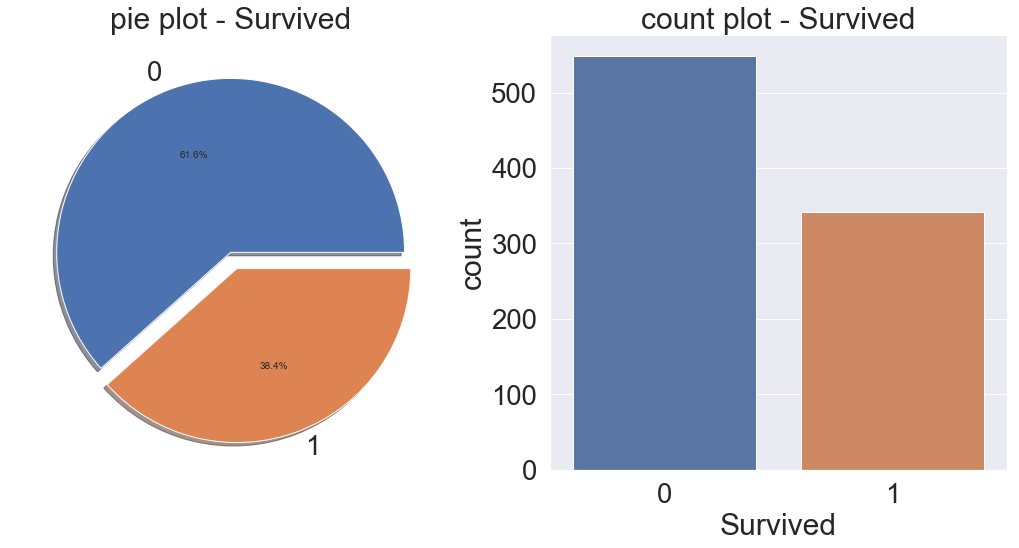

In [180]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('count plot - Survived')

plt.show()

우리의 목표는 **Test set** 데이터에 존재하는 Passenger의 `Survived` 값이 0인지 1인지를 예측하는 것입니다.

먼저 **Train set** 데이터에서 `Survived` feature의 비율을 확인해보았습니다.

0인 값이 61.6%, 1인 값이 38.4%의 비율로 생존한 비율이 더 낮다는 걸 볼 수 있습니다.

## 2. 탐색적 데이터 분석(EDA, Exploratory Data Analysis)

이제 어떤 feature가 `Survived`에 얼마나 영향을 미치는지 확인해보아야 합니다.

이를 위해서는 적절한 시각화가 필요합니다.

시각화 패키지는 `matplotlib`, `seaborn`, `plotly` 등이 있습니다.

본 커널에서는 `matplotlib`와 `seaborn`을 주로 사용할 것 입니다.

### 2.1 Pclass

가장 먼저 Pclass feature를 살펴봅시다.

Pclass는 **서수**(순서가 있는 수)형 데이터입니다. 즉, 카테고리 역할을 동시에 하는 데이터입니다.

pandas의 DataFrame에서는 SQL 쿼리의 groupby와 같은 `groupby` 메소드를 사용하면 쉽게 데이터를 묶어 볼 수 있습니다.

경우에 따라서는 [pivot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html)이라는 메소드를 사용해도 유용합니다.

In [181]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [182]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [183]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [184]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


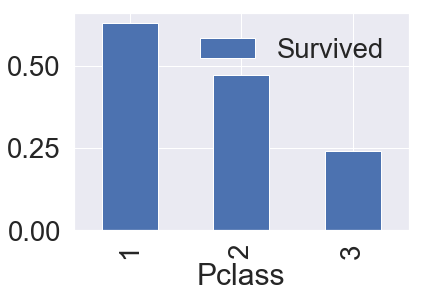

In [185]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

`groupby` 메소드를 이용하여 출력된 table을 보아도 **Pclass** feature가 **Survived**값에 큰 영향을 마친다고 확인 할 수 있습니다.

`plot.bar` 메소드를 통해 막대 그래프로 시각화하니 더 확실하게 알 수 있습니다.

### 2.2 Sex

이제 **Sex** feature를 확인해봅시다.

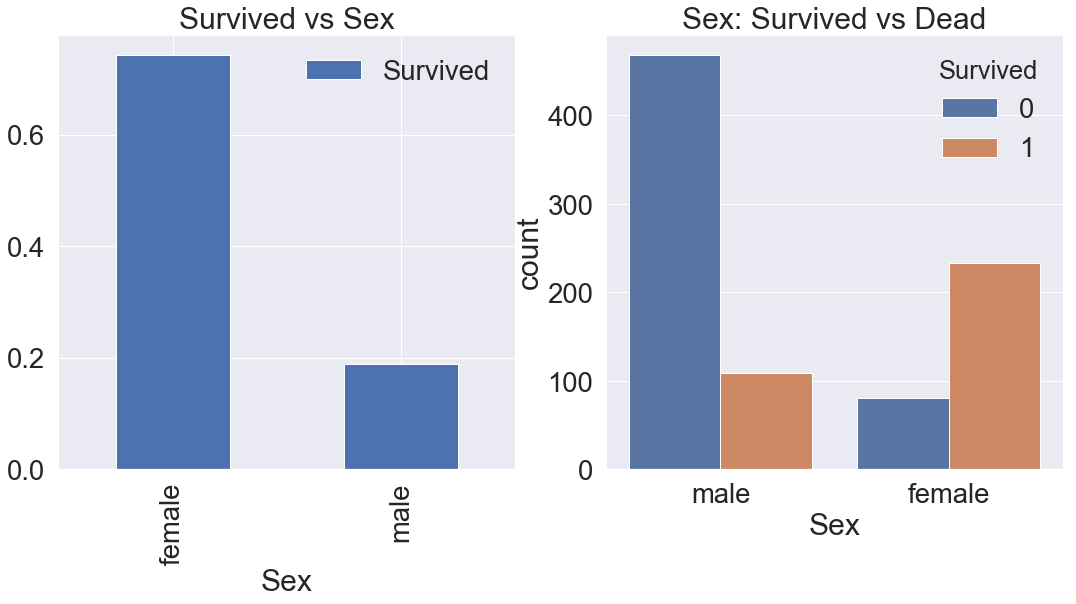

In [186]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

좌측의 막대 그래프를 보면 생존자 중 female인 passenger가 male인 passenger가 월등히 많음을 확인 할 수 있으며

각 Sex별 생존, 사망자 수를 비교해보아도 female인 passenger는 생존자가 더 많았으나 male인 passenger는 사망자가 더 많음을 확인 할 수 있었습니다.

이를 통해 **Sex** feature도 **Survived**에 큰 영향을 끼친다는 것을 알 수 있습니다.

### 2.3 Both Sex and Pclass

이번에는 Sex, Pclass 두 feature에 관해 생존이 어떻게 변화하는지 확인해봅시다.


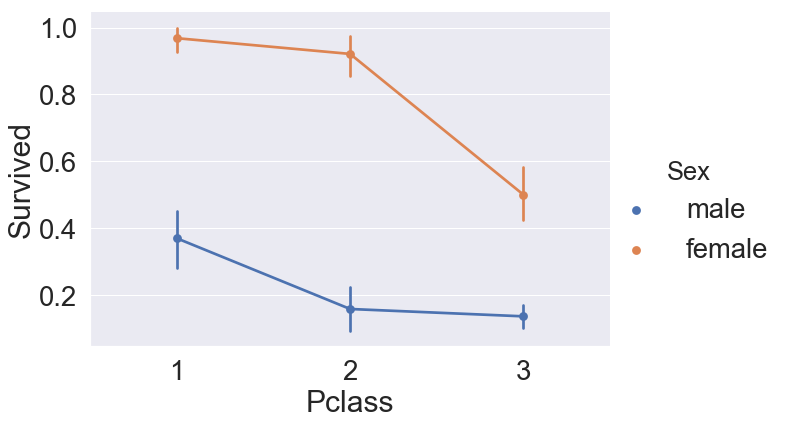

In [187]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

모든 Pclass, Sex에서 생존률이 male보다 female에 높음을 볼 수 있습니다.

### 2.4 Age

이번에는 **Age** feature에 대해 조사해봅시다.

In [188]:
print('age of oldest passenger: {:.1f} Years'.format(df_train['Age'].max()))
print('age of youngest passenger: {:.1f} Years'.format(df_train['Age'].min()))
print('average of passenger`s age: {:.1f} Years'.format(df_train['Age'].mean()))

age of oldest passenger: 80.0 Years
age of youngest passenger: 0.4 Years
average of passenger`s age: 29.7 Years


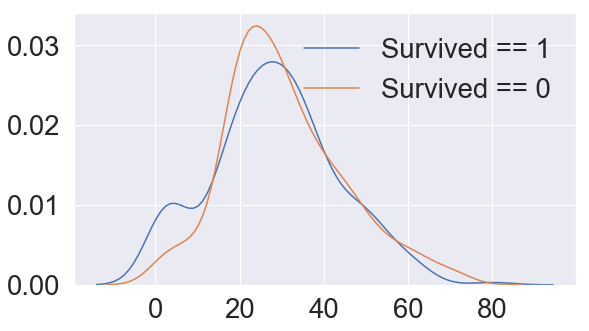

In [189]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))

sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])

plt.show()

가장 나이가 많은 passenger는 80세, 가장 어린 passengersms 0.4세이며, passenger의 평균 나이는 29.7세입니다.

`seaborn`의 커널 밀도 분포를 곡선 그래프로 볼 수 있는 `kdeplot` 메소드를 이용하여 살펴본 결과, 전체적인 구간에서는 나이가 생존에 관계가 없어보이나 15세 미만 구간에서 특별하게 생존률이 높음을 확인할 수 있습니다.

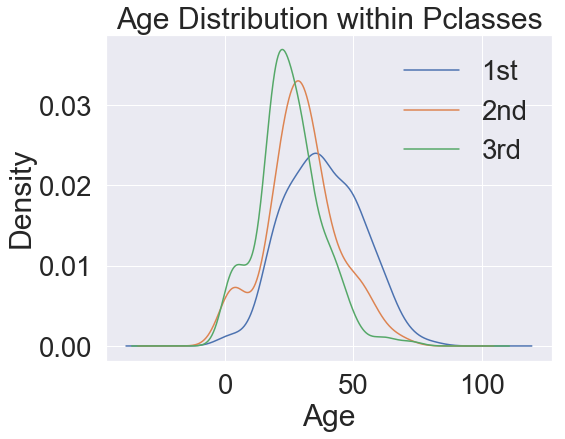

In [190]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within Pclasses')
plt.legend(['1st', '2nd', '3rd'])

plt.show()

`kdeplot`을 통해 확인해보니 나이가 높을 수록 **Pclass**가 높습니다.

이젠 나이대가 높아짐에 따라 생존률 변화를 알기 위해 누적 확률을 활용한 시각화를 해봅시다.

+ 누적 확률 개념 참고 : [ratsgo님의 정규분포 누적분포함수와 중심극한정리](https://ratsgo.github.io/statistics/2017/06/27/normal/)

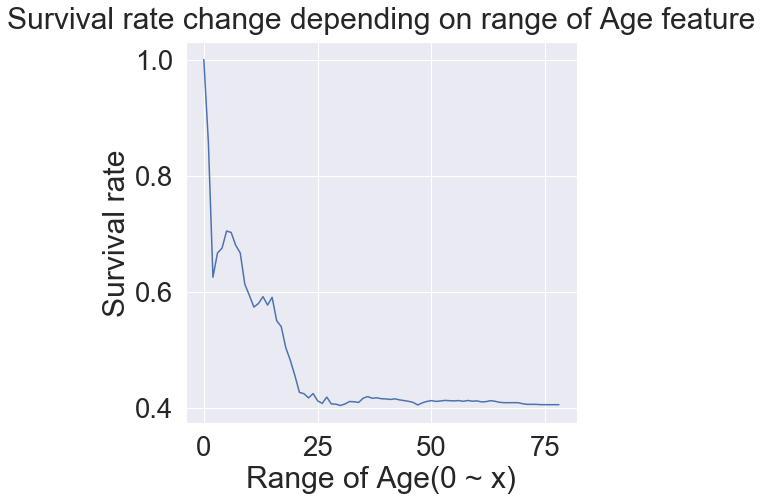

In [191]:
cumulate_survive_ratio = []
for i in range(1, 80):
    cumulate_survive_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(cumulate_survive_ratio)
plt.title('Survival rate change depending on range of Age feature', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0 ~ x)')
plt.show()

누적 확률을 통해 보았을 때 나이가 낮을 수록 생존률이 확실히 높은 것을 볼 수 있습니다.

나이도 중요한 feature입니다.

지금까지의 분석을 통해 얻은 정보를 정리하면

1. 여자이거나
2. 나이가 어리거나
3. Pclass가 높을 수록(값이 낮을 수록)

생존률이 높음을 확인했습니다.

### 2.5 Embarked

**Embarked** feature는 passenger가 승선한 항구를 나타냅니다.
- C : Cherbourg
- Q : Queenstown
- S : Southampton

**Embarked** feature를 조사해봅시다.

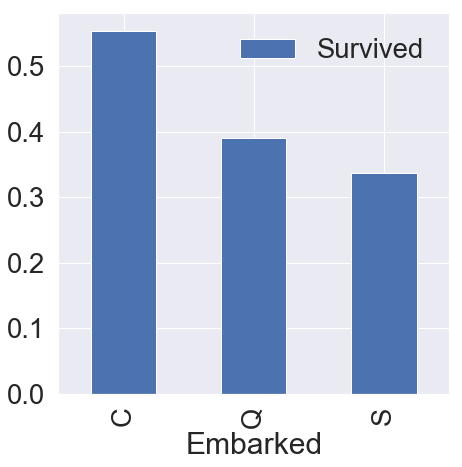

In [192]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().plot.bar(figsize=(7, 7))

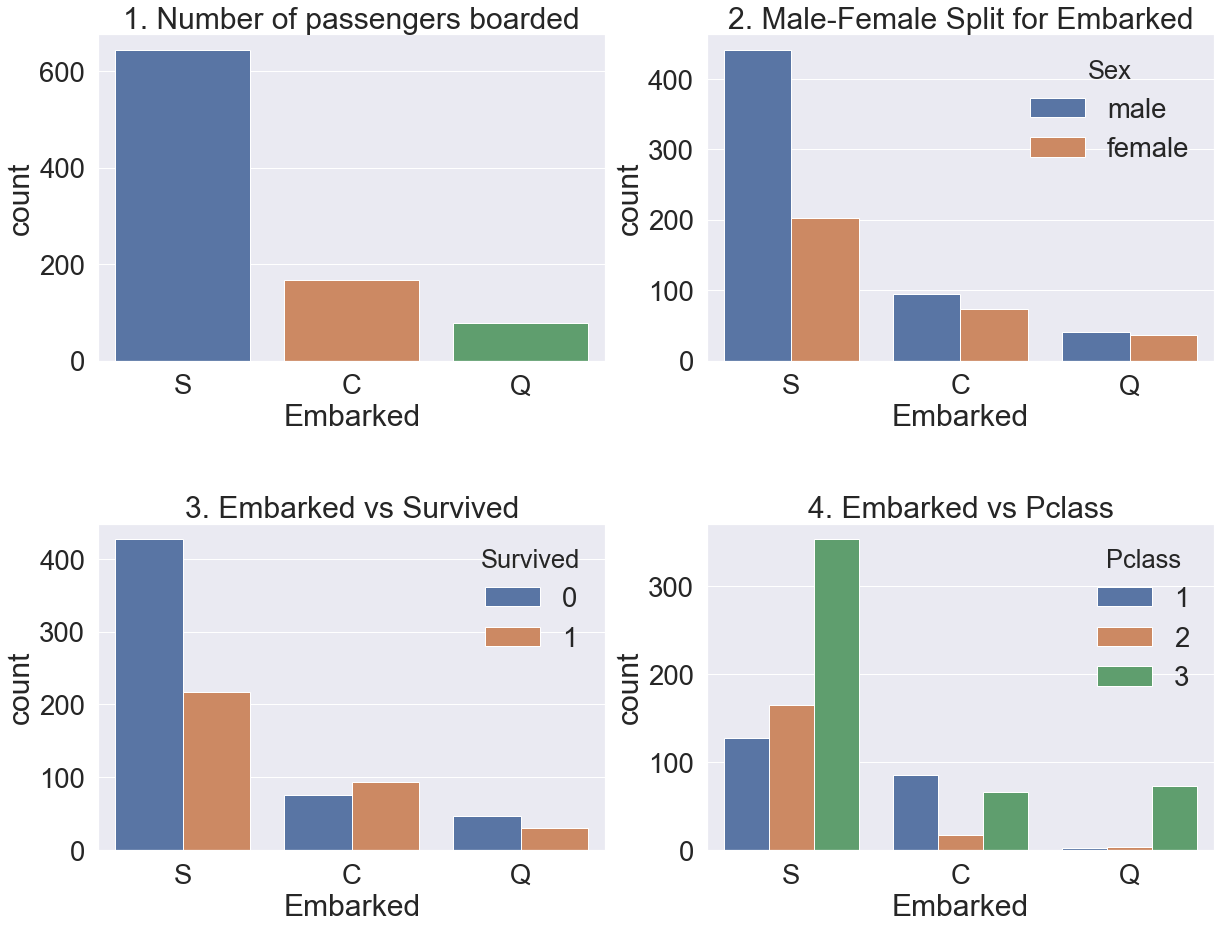

In [193]:
# 단순 Embarked feature에 따른 passenger 수를 막대 그래프로 시각화
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('1. Number of passengers boarded')
# Sex feature를 카테고리로 막대 그래프 시각화
sns.countplot('Embarked', data=df_train, hue='Sex', ax=ax[0, 1])
ax[0, 1].set_title('2. Male-Female Split for Embarked')
# Embarked feature별 생존, 사망 수를 막대 그래프로 시각화
sns.countplot('Embarked', data=df_train, hue='Survived', ax=ax[1, 0])
ax[1, 0].set_title('3. Embarked vs Survived')
# 각 Embarked 별 Pclass 수를 막대 그래프로 시각화
sns.countplot('Embarked', data=df_train, hue='Pclass', ax=ax[1, 1])
ax[1, 1].set_title('4. Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5) # figure가 겹치지 않게 간격 조절
plt.show()

+ Figure 1 - S(Southampton)에서 가장 많은 승객이 탑승했씁니다.
+ Figure 2 - C(Cherbourg)와 Q(Queenstown)은 남녀 비율이 비슷하고 S는 남자가 더 많습니다.
+ Figrue 3 - S의 경우 생존률이 특히 낮은 것을 볼 수 있습니다.
+ Figure 4 - 이전 **Pclass** feature를 분석한 결과를 생각해보면 S에서 탑승한 Passenger가 Pclass가 낮은 승객 비율이 많기 때문에 생존확률이 낮게 나온 것으로 보입니다.

### 2.6 Family - SibSp + Parch

**Sibsp**(형제, 자매) feature와 **Parch**(부모, 자녀) feature를 합치면 같이 탑승한 가족의 수가 됩니다.

이 두 feature를 합쳐 **Family**라는 새로운 feature를 만들어서 생각해봅시다.

In [194]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 본인도 가족이기에 더해줍니다.
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [195]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


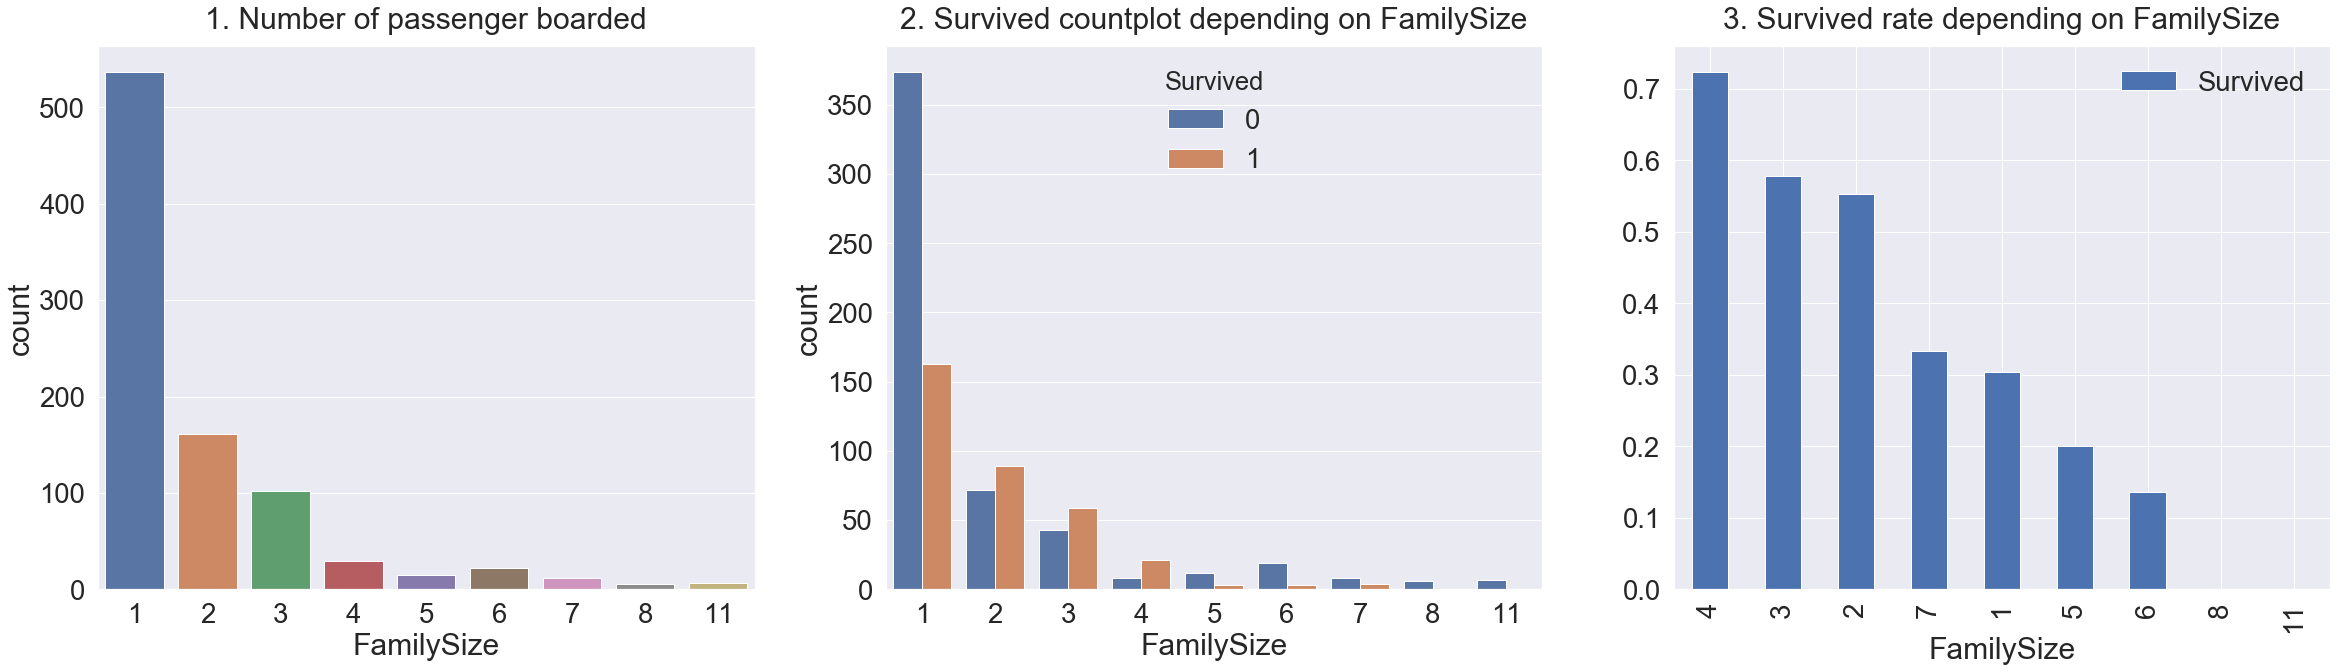

In [196]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('1. Number of passenger boarded', y=1.02)
sns.countplot('FamilySize', data=df_train, hue='Survived', ax=ax[1])
ax[1].set_title('2. Survived countplot depending on FamilySize', y=1.02)
df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('3. Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

+ Figure 1 - 혼자서 탑승한 passenger가 가장 많고 그 다음으론 순서대로 2, 3, 4명입니다.
+ Figure 2, 3 - 2, 3, 4명 단위로 탑승한 가족의 경우 생존 비율이 더 높았고 그 외에는 사망률이 더 높습니다. 또한, 가족수가 너무 작거나 크면 생존률이 떨어지는 것을 확인할 수 있습니다. 2~4명의 경우 생존률이 가장 높습니다.

### 2.7 Fare

**Fare** feature는 탑승 요금입니다.

해당 feature는 연속 데이터이므로 histogram을 통해 시각화해봅시다.

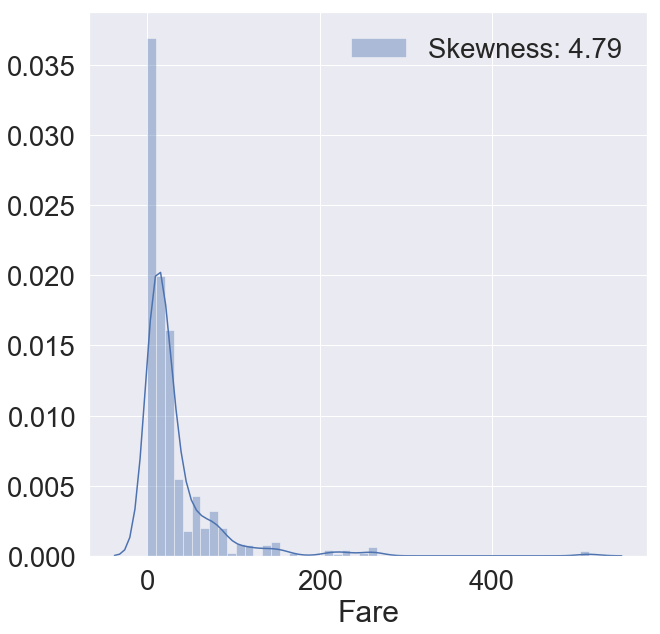

In [197]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

plt.show()

참고 커널에서는 **Fare** 데이터에 `log`를 취해 비대칭성을 최소화한다.

해당 커널 작성자는 이후 **Feature engineering**을 진행할 때 필요한 부분인데 미리 작업한 것이라고 했기에 일단 따라서 작성하고 이후 해당 과정을 진행할 때 이해하보도록 하겠습니다.

In [198]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
# test.csv의 데이터에서 이상하게 1개의 row가 Fare 값이 null이기 때문에 평균값으로 처리해줍니다.

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

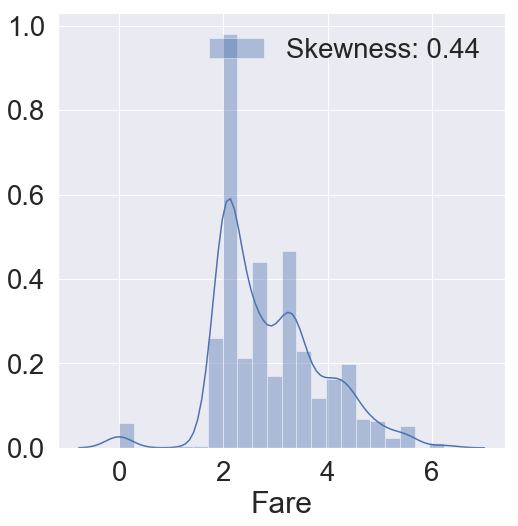

In [199]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], label='Skewness: {:.2f}'.format(df_train['Fare'].skew()))
g = g.legend(loc='best')

### 2.9 Ticket

이 feature는 티켓 번호입니다. 또한 NaN이 없는 String Type의 데이터인데 이 데이터를 가공을 해야만 실제 모델에 사용할 수 있습니다.

규칙성이 없어보이고 매우 다양합니다. 이를 모델에 사용하기 위해서는 아이디어가 필요합니다.

> 참고한 커널의 작성자는 이 feature를 사용하지 않아 타이타닉 문제를 풀이하고 이후 학습을 끌어올리기 위해 해보아야겠습니다.

## 3. 특성 공학 (Feature Enginnering)

**특성 공학**이란 특정한 기능(AI 알고리즘 적용, 빅데이터 분석 등)을 수행하기 위해 데이터에 대한 지식을 활용하여 feature를 생성하거나 정제(가공)하는 과정을 이야기합니다.

가장 먼저 데이터 셋에 존재하는 `null` 데이터를 존재하는 값으로 채워주려고 합니다.

아무 의미없는 숫자로 채우면 안되고 해당 feature의 Statistics를 참고하거나 좋은 아이디어를 적용해서 채워야 합니다.

특히, **feature enginnering**은 실제 모델 학습에 사용하려고 진행하는 과정이기 떄문에 **train** dataset뿐 아니라 **test** dataset도 똑같이 적용해주어야 합니다!! 꼭 잊으면 안됩니다.

### 3.1 Fill Null

#### 3.1.1 Fill null in Age using title

In [200]:
df_train['Age'].isnull().sum()

177

**Age** feature의 데이터가 null인 수가 177이나 됩니다.

177개의 null 데이터를 채울 수 있는 여러가지 아이디어가 있을텐데 참고 커널의 작성자는 데이터셋의 이름에 포함되어 있는

title(영어권에서 사용하는 Mr, Miss 등)을 이용합니다.

`pandas series`에는 data를 string으로 변환해주는 `str` 메소드와 정규표현식을 적용할 수 있게 해주는 `extract` 메소드가 있습니다.

두 메소드를 활용하여 title을 쉽게 추출할 수 있습니다.

title을 **Initial**이라는 이름의 column에 저장합시다.

그리고 `pandas`의 `crosstab`을 통해 추출한 **Initial**과 **Sex**간의 수를 살펴봅시다.

> 이름이 잘못 적혀져 있거나 성별을 잘못 분류했을 수도 있으니까 살펴봅니다.

In [201]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [202]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [203]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [204]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


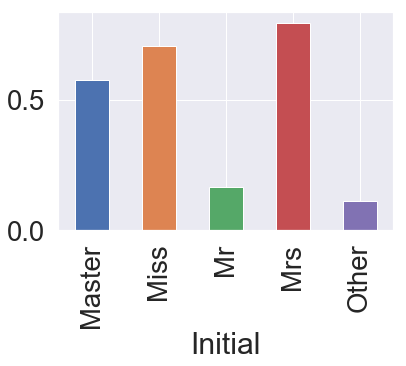

In [205]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

이제 값을 변환했으니 `Null` 값을 채울 차례입니다.

`Null` 데이터를 채우는 방법은 매우 많은데 참고 커널의 작성자는 **Statistics**를 활용하는 방법을 사용합니다.

여기서 **Statistics**는 **train data**의 것을 의미합니다.

우리는 항상 **test** dataset을 unseen으로 두어야 합니다.

따라서, **train** dataset에서 얻은 statistics를 기반으로 `Null` 데이터를 채워주어야 합니다.

위의 `mean` 메소드를 통해 각 **Initial** feature 값의 평균을 알아내었습니다.

이를 이용하여 `null` 데이터를 passenger의 **Initial** 평균 값으로 채워줍시다.

In [206]:
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=='Mr'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=='Mrs'), 'Age'] = 36
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=='Master'), 'Age'] = 5
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=='Miss'), 'Age'] = 22
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=='Other'), 'Age'] = 46
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial=='Mr'), 'Age'] = 33
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial=='Mrs'), 'Age'] = 36
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial=='Master'), 'Age'] = 5
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial=='Miss'), 'Age'] = 22
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial=='Other'), 'Age'] = 46

**Age** feature의 `null` 데이터를 모두 채웠으니 다른 어떤 feature가 `null` 데이터가 있는지 알아보자.

In [207]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Cabin       687
Embarked      2
dtype: int64

In [208]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]

Cabin    327
dtype: int64

**Embarked** feature에 `null`데이터가 **train** dataset에만 2개 있고, **Cabin** feature는 각각 **train**set에 687개 **test**set에 327개 있다.

딱 2개 있는 **Embarked** feature의 `null` 데이터부터 채워주고 필요없어 보이는 **Cabin** feature는 추후에 날려주겠습니다.

#### 3.1.2 Fill Null in Embarked

**Embarked** feature는 `null` 데이터가 2개이고, `S`에서 가장 많은 승객이 탑승했으니 간단하게 `S`로 채워주겠습니다.

In [209]:
df_train['Embarked'].fillna('S', inplace=True)

In [210]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Cabin    687
dtype: int64

### 3.2 Change Age (continuous to categorical)

**Age**는 현재 연속적인 feature입니다. 그대로 사용해서 모델을 세울 수 있지만 Age를 몇 개의 group으로 나누어 카테고리화 시켜줄 수 있습니다.

연속적인 feature를 카테고리화하면 자칫 **information loss**가 발생할 수도 있습니다.

참고 커널에서는 다양한 방법을 소개해주는 것이 목적으로 진행하였기 때문에 같이 진행하도록 하겠습니다.

DF의 indexing 방법인 loc를 사용하여 직접해줄 수 있고, 아니면 apply를 사용해 함수를 넣어줄 수는 등의 여러가지의 방법이 있다고 합니다.

loc 예제는 위의 age mean 값을 채워주었을 때 사용해보았으므로 이번에는 apply를 사용해보도록 하겠습니다.

In [211]:
df_train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      33.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     33.0
18     31.0
19     36.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     33.0
27     19.0
28     22.0
29     33.0
       ... 
861    21.0
862    48.0
863    22.0
864    24.0
865    42.0
866    27.0
867    31.0
868    33.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    33.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    22.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [212]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7
    
df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

In [214]:
df_train.groupby(['Age_cat'])['PassengerId'].count()

Age_cat
0     66
1    102
2    256
3    304
4     89
5     48
6     19
7      7
Name: PassengerId, dtype: int64

파생 feature를 생성했으므로 기존 feature인 **Age**를 제거하는 것이 맞겠지만 참고 커널의 작성자는 상관 관계가 높아도 모델의 설명력(성능)에 도움이 될 수 있으니 남겨 진행하였기에 저도 남기겠습니다.

### 3.3 Change Initial, Embarked and Sex (string to numerical)

현재 **Initial** featuresms `Mr`, `Mrs`, `Miss`, `Master`, `Other` 총 5가지의 string type 데이터로 이루어져 있습니다.

이런 카테고리 데이터를 모델에 입력값으로 넣어줄 때 컴퓨터가 쉽게 인식할 수 있도록 수치화 시켜주는 것입니다.

`map` 메소드를 이용하여 매핑을 진행하겠습니다.

**Sex**와 **Embarked** feature들도 같은 과정을 진행하겠습니다.

In [216]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [218]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

In [221]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

이제 각 feature 간의 상관관계를 확인해보려고 합니다.
두 변수간의 Pearson correlation을 구하면 (-1, 1) 범위의 값을 얻을 수 있습니다.
+ -1로 갈수록 음의 상관관계
+ 1로 갈수록 양의 상관관계
+ 0이 가까울 수록 상관관계가 없음

`seaborn`의 `heatmap`을 통해 시각화를 진행해보겠습니다.

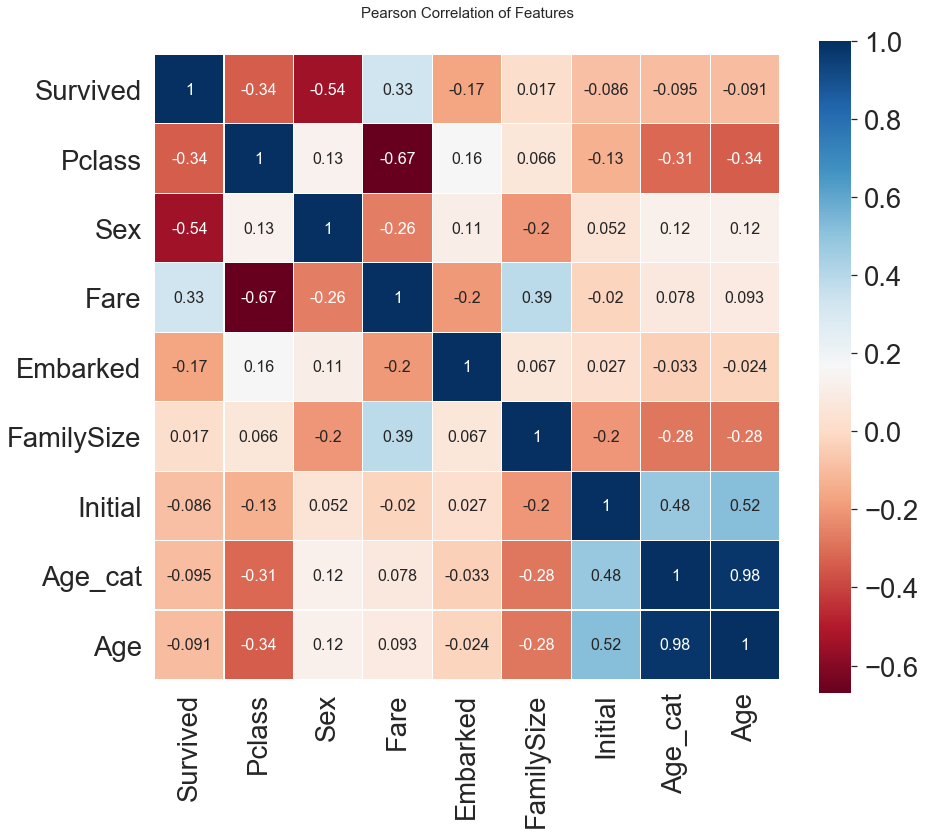

In [224]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat', 'Age']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

plt.show()

앞서 EDA에서 보았던 feature간 상관관계가 어느 정도 있는 것을 볼 수 있습니다.

`heatmap`을 보고 얻을 수 있는 또 하나의 정보는 서로 강한 상관관계를 가지는 feature들이 없다는 것입니다.
(Age - Age_cat 제외)

이 사실은 모델을 학습시킬 때 불필요한 feature가 없다는 것을 의미합니다. 강한 상관관계(1또는 -1)를 가진 두 feature가 있다면, 두 feature를 통해서 얻을 수 있는 정보는 하나일테니까요.

이제 모델 학습을 하기 전 data preprocessing(데이터 전처리)를 진행해봅시다.

### 3.4 One-hot encoding on Initial and Embarked

수치화를 진행한 카테고리 데이터를 그대로 모델에 사용해도 되지만 모델의 성능을 높이기 위해 [**one-hot encoding**](https://brunch.co.kr/@sokoban/8)을 해줄 수 있습니다.

수치화는 간단하게 Master는 0, Miss는 1, Mr는 2 ... 처럼 매핑해주는 것을 의미합니다.

**One-hot encoding**은 위 카테고리를 아래와 같이 0또는 1로 이루어진 5차원의 **벡터**로 나타내는 것을 말합니다.

그렇게 되면 각 클래스간 연관성을 **Orthogonal**(직교, 동일하게) 만들 수 있습니다.

그래서 각 클래스 간의 상관 관계가 없어집니다.
> 단순하게 수치화를 했을 경우 Master와 Miss가 가까운 관계, Mrs와 Other이 가까운 관계로 해석될 수 있습니다.
> 더 자세한 정보는 `Label Encoding vs One-hot Encoding`으로 검색해서 알아봅시다.

위와 같은 작업을 직접 코딩할 수도 있지만 `pandas`의 `get_dummies`를 사용하여 쉽게 해결할 수 있습니다.

총 5개의 카테고리니까 **One-hot encoding**을 하고나면 새로운 5개의 column이 생겨납니다.

**Initial**을 prefix로 두어서 구분이 쉽게 만들어 줍시다.

In [225]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [226]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [231]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

KeyError: "['Embarked'] not in index"

In [232]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,38.0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,26.0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,35.0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,35.0,2.085672,1,3,0,0,1,0,0,0,0,1


아주 간단하게 **One-hot encoding**을 적용했습니다!
> 잘모르겠다 더 알아보자


다른 패키지(`sklearn` 등)로도 **One-hot encoding**을 적용할 수 있지만 참고 커널의 작성자는 해당 커널에서 다루지 않았습니다.
> 가끔 카테고리가 100개가 넘어가는 경우 **One-hot encoding**을 가용하면 column이 100개가 생겨 학습시 매우 버거울 수 있습니다.(aka. 차원의 저주)
> 이런 경우에는 다른 방법을 사용하기도 하는데 다른 기회에 더 자세히 알아봅시다!


### 3.5 Drop columns

이제 마지막 **feature engineering**으로 필요없는 feature들을 없애버립시다.

+ **PassengerId, Cabin, Ticket** - 영향(필요)이 거의 없는 feature
+ **Name** - **feature engineering** 단계에서 **Sex** feature의 데이터를 채울 때 사용하고 이제 필요가 없습니다.
+ **SibSp, Parch** - 두 feature 데이터 값을 더해서 **FamilySize**이름의 새 Feature를 생성하고 이제 필요가 없습니다.

In [233]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [234]:
df_train.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
Fare          float64
FamilySize      int64
Age_cat         int64
Initial_0       uint8
Initial_1       uint8
Initial_2       uint8
Initial_3       uint8
Initial_4       uint8
Embarked_0      uint8
Embarked_1      uint8
Embarked_2      uint8
dtype: object

In [236]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,38.0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,26.0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,35.0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,35.0,2.085672,1,3,0,0,1,0,0,0,0,1


In [237]:
df_test.dtypes

Pclass          int64
Sex             int64
Age           float64
Fare          float64
FamilySize      int64
Age_cat         int64
Initial_0       uint8
Initial_1       uint8
Initial_2       uint8
Initial_3       uint8
Initial_4       uint8
Embarked_0      uint8
Embarked_1      uint8
Embarked_2      uint8
dtype: object

In [238]:
df_test.head()

,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,34.5,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,47.0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,62.0,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,27.0,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,22.0,2.508582,3,2,0,0,0,1,0,0,0,1


**Survived**(target) feature를 제외하면 **train, test** 데이터 셋이 같은 column을 가진 것을 확인 할 수 있습니다.

## 4. 모델 개발 및 학습

드디어 본격적인 진행을 할 수 있게 되었네요 !

`Sklearn`은 머신러닝의 처음부터 끝까지 다 있다고 하는데요, 

feature engineering, preprocessing, 지도 학습 알고리즘, 비지도 학습 알고리즘, 모델 평가, 파이프라인 등... 머신러닝에 관련된 모든 작업들이 손쉬운 인터페이스로 구현되어 있다고 합니다.

데이터 분석과 머신러닝을 하고 싶다면 `SKlearn`을 반드시 숙지해야한다고 합니다.

> 추천 도서 
> + 파이썬 라이브러리를 활용한 머신러닝(Introduction to machine larning with Python)
> + 핸즈온 머신러닝
> `sklearn` 뿐 아니라 머신러닝, 딥러닝에 관한 기본을 잘 설명하고 있는 책들이라고 